GOOGLE PLAYSTORE PROJECT

dataset from kaggle: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import streamlit as st

In [2]:
#importing the sample dataset created into the file: 'sample_dataset.ipynb' on which we will perform our analysis.
google_df = pd.read_csv('/Users/christianbraga/Desktop/programming_final_project/sample_google_df.csv')

EXPLORATORY DATA ANALYSIS

data exploration

In [3]:
first_5_rows = google_df.head(5)
first_5_rows
#the dataset shows the information of 10000 application of the google playstore, each row represents an application

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Snow Mo: Cannon Shooting Game,com.naptechgames.snowmo,Action,0.0,0.0,1+,1.0,3,True,0.0,...,https://naptechlabs.co.uk,contact@naptechlabs.co.uk,"Apr 15, 2021","Apr 15, 2021",Everyone,http://naptechlabs.co.uk/privacy-policy,True,False,False,2021-06-16 10:32:29
1,404 Gallery,com.filbert.gallery,Shopping,5.0,15.0,10+,10.0,44,True,0.0,...,NaN,info@filbert.ai,"Jan 29, 2020","Jan 29, 2020",Everyone,NaN,False,False,False,2021-06-16 10:47:56
2,Banana pudding cheesecake - cheesecake recipe,com.bananapuddingcheesecake.jamal,Food & Drink,0.0,0.0,1+,1.0,4,True,0.0,...,https://11334.appads-txt.com/ads-app.txt,jamalhelal23@gmail.com,"May 5, 2021","May 06, 2021",Teen,https://27847.hostmypolicy.com/,True,False,False,2021-06-16 09:45:18
3,POATAXI,br.com.originalsoftware.taxifonecliente.taxich...,Business,4.5,17.0,500+,500.0,606,True,0.0,...,http://www.originalsoft.com.br,suporte@originalsoft.com.br,"Nov 25, 2013","Sep 21, 2016",Everyone,NaN,False,False,False,2021-06-15 23:27:28
4,Aptitude Reasoning Tricks & Tips,com.pbs.studio.aptitude.reasoning.tricks,Education,0.0,0.0,100+,100.0,408,True,0.0,...,NaN,ajay112kumar112@gmail.com,"Sep 20, 2019","Dec 06, 2019",Everyone,https://pbsstudiocric.blogspot.com/2018/03/pri...,True,False,False,2021-06-16 05:41:09


In [4]:
first_5_rows[['Currency','Size','Minimum Android','Developer Id']]

,Currency,Size,Minimum Android,Developer Id
0,USD,4.9M,5.1 and up,NapTech Labs
1,USD,8.3M,4.4 and up,Filbert
2,USD,25M,4.4 and up,jamal helal
3,USD,7.7M,4.0.3 and up,Original Software
4,USD,3.8M,4.1 and up,PBS Studio


In [5]:
last_5_rows = google_df.tail(5)
last_5_rows

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
9995,Snap Box,com.appswiz.snapbox,Business,0.0,0.0,"10,000+",10000.0,14281,True,0.0,...,https://www.snap-box.co.uk/,appswiz.w.ii@gmail.com,"Oct 30, 2017","Oct 31, 2017",Everyone,https://www.snap-box.co.uk/,False,False,False,2021-06-16 04:17:39
9996,EquiTracker,ca.stevenlyall.equitracker,Tools,4.0,134.0,"10,000+",10000.0,22071,True,0.0,...,http://equitracker.app,info@equitracker.app,"May 12, 2015","Nov 08, 2020",Everyone,http://equitracker.net/privacy_policy.html,True,True,False,2021-06-16 13:29:40
9997,Skull Wallpaper,com.skullwallpaper.chodev,Personalization,0.0,0.0,50+,50.0,90,True,0.0,...,https://link503.blogspot.com/,abdulmufit503@gmail.com,"Sep 18, 2019","Nov 03, 2020",Everyone,NaN,True,False,False,2021-06-15 20:29:43
9998,Spartan Fitness Hub,com.gymspartanorai.rmit,Health & Fitness,0.0,0.0,100+,100.0,117,True,0.0,...,https://regalmojo.com/,info@regalmojo.com,"Oct 4, 2020","Oct 04, 2020",Everyone,NaN,False,False,False,2021-06-15 20:29:38
9999,Flormar Bahrain,com.hidile.flormar,Shopping,0.0,0.0,100+,100.0,139,True,0.0,...,NaN,moontop@batelco.com.bh,"Apr 28, 2021","Apr 28, 2021",Everyone,NaN,False,False,False,2021-06-15 22:12:25


In [6]:
df_info = google_df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           10000 non-null  object 
 1   App Id             10000 non-null  object 
 2   Category           10000 non-null  object 
 3   Rating             9890 non-null   float64
 4   Rating Count       9890 non-null   float64
 5   Installs           9998 non-null   object 
 6   Minimum Installs   9998 non-null   float64
 7   Maximum Installs   10000 non-null  int64  
 8   Free               10000 non-null  bool   
 9   Price              10000 non-null  float64
 10  Currency           9998 non-null   object 
 11  Size               9998 non-null   object 
 12  Minimum Android    9979 non-null   object 
 13  Developer Id       9999 non-null   object 
 14  Developer Website  6712 non-null   object 
 15  Developer Email    9999 non-null   object 
 16  Released           9671

In [7]:
df_columns = google_df.columns
df_columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [8]:
df_shape = google_df.shape
df_shape

(10000, 24)

In [9]:
#in some columns i have null values, i want to figure out how many are
columns_null_values = google_df.isnull().sum()
columns_null_values

App Name                0
App Id                  0
Category                0
Rating                110
Rating Count          110
Installs                2
Minimum Installs        2
Maximum Installs        0
Free                    0
Price                   0
Currency                2
Size                    2
Minimum Android        21
Developer Id            1
Developer Website    3288
Developer Email         1
Released              329
Last Updated            0
Content Rating          0
Privacy Policy       1797
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [10]:
df_description = google_df.describe().T

Data Wrangling

In [11]:
#i'm going to work on a copy of our dataset
copy_df = google_df.copy()

In [12]:
#now i'm going to deal with the rows and columns of the dataset
#each row represents an application so for convenience i'm going to put the App Name column as index of the dataset
#and drop the respective column. Then i want to change the column labels in a way that is easier to work with
copy_df.index = copy_df['App Name']
index_adjusted = list(map(lambda x : x.lower().replace(' ','_'),copy_df.index))
copy_df.index = index_adjusted
copy_df.index.name = 'app_name'
copy_df.drop('App Name',axis=1,inplace = True)
new_column_labels = list(map(lambda x : x.lower().replace(' ','_'),copy_df.columns))
copy_df.columns = new_column_labels
copy_df.head(5)

,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,currency,...,developer_website,developer_email,released,last_updated,content_rating,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time
app_name,,,,,,,,,,,,,,,,,,,,,
snow_mo:_cannon_shooting_game,com.naptechgames.snowmo,Action,0.0,0.0,1+,1.0,3,True,0.0,USD,...,https://naptechlabs.co.uk,contact@naptechlabs.co.uk,"Apr 15, 2021","Apr 15, 2021",Everyone,http://naptechlabs.co.uk/privacy-policy,True,False,False,2021-06-16 10:32:29
404_gallery,com.filbert.gallery,Shopping,5.0,15.0,10+,10.0,44,True,0.0,USD,...,NaN,info@filbert.ai,"Jan 29, 2020","Jan 29, 2020",Everyone,NaN,False,False,False,2021-06-16 10:47:56
banana_pudding_cheesecake_-_cheesecake_recipe,com.bananapuddingcheesecake.jamal,Food & Drink,0.0,0.0,1+,1.0,4,True,0.0,USD,...,https://11334.appads-txt.com/ads-app.txt,jamalhelal23@gmail.com,"May 5, 2021","May 06, 2021",Teen,https://27847.hostmypolicy.com/,True,False,False,2021-06-16 09:45:18
poataxi,br.com.originalsoftware.taxifonecliente.taxich...,Business,4.5,17.0,500+,500.0,606,True,0.0,USD,...,http://www.originalsoft.com.br,suporte@originalsoft.com.br,"Nov 25, 2013","Sep 21, 2016",Everyone,NaN,False,False,False,2021-06-15 23:27:28
aptitude_reasoning_tricks_&_tips,com.pbs.studio.aptitude.reasoning.tricks,Education,0.0,0.0,100+,100.0,408,True,0.0,USD,...,NaN,ajay112kumar112@gmail.com,"Sep 20, 2019","Dec 06, 2019",Everyone,https://pbsstudiocric.blogspot.com/2018/03/pri...,True,False,False,2021-06-16 05:41:09


In [13]:
#remove all columns that are useless for the purpose of the analysis
copy_df.drop(['app_id','developer_id','minimum_installs','maximum_installs','minimum_android','currency','developer_website','developer_email','privacy_policy','last_updated','editors_choice','scraped_time'],axis=1,inplace=True)
copy_df.head(5)

,category,rating,rating_count,installs,free,price,size,released,content_rating,ad_supported,in_app_purchases
app_name,,,,,,,,,,,
snow_mo:_cannon_shooting_game,Action,0.0,0.0,1+,True,0.0,4.9M,"Apr 15, 2021",Everyone,True,False
404_gallery,Shopping,5.0,15.0,10+,True,0.0,8.3M,"Jan 29, 2020",Everyone,False,False
banana_pudding_cheesecake_-_cheesecake_recipe,Food & Drink,0.0,0.0,1+,True,0.0,25M,"May 5, 2021",Teen,True,False
poataxi,Business,4.5,17.0,500+,True,0.0,7.7M,"Nov 25, 2013",Everyone,False,False
aptitude_reasoning_tricks_&_tips,Education,0.0,0.0,100+,True,0.0,3.8M,"Sep 20, 2019",Everyone,True,False


In [14]:
#i'm going to deal with the null value of the columns
copy_df.isnull().sum()

category              0
rating              110
rating_count        110
installs              2
free                  0
price                 0
size                  2
released            329
content_rating        0
ad_supported          0
in_app_purchases      0
dtype: int64

In [15]:
#I will fill the null values of the rating and rating count columns with their average value for the specific category.

#Function to find the mean rating and ratign count for each category.
def mean_rating_and_rating_count_for_category():
    avg_rating_and_rating_count_for_category =  copy_df.groupby('category')[['rating','rating_count']].mean()
    avg_df = pd.DataFrame(avg_rating_and_rating_count_for_category).T
    return avg_df.round(1)
mean_rating_and_rating_count_for_category()

category,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,Card,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
rating,2.8,3.0,2.3,1.6,2.1,1.3,2.8,2.5,1.4,2.7,...,3.2,2.2,2.3,2.5,2.3,2.0,2.8,3.1,3.2,2.9
rating_count,43907.4,3789.0,5679.6,491.9,1024.9,26.4,1140.6,1044.3,277.2,2029.4,...,4324.4,5886.9,843.0,3840.0,1987.9,112.0,2320.1,31617.4,40983.8,470.9


In [16]:
#Function to fill the null values in the rating column with the average rating value for the specific category
def fillna_rating_with_mean_for_category():
    copy_df['category'].astype(str)
    categories = copy_df['category'].value_counts().index.tolist()
    subset = copy_df[copy_df['rating'].isnull()]
    for i in categories:
        musk = subset['category'] == i
        subset.loc[musk,'rating'] = mean_rating_and_rating_count_for_category()[i][0].astype(float)
        copy_df.update(subset)
fillna_rating_with_mean_for_category()

In [17]:
#Function to fill the null values in the rating_count column with the average rating value for the specific category
def fillna_rating_count_with_mean_for_category():
    copy_df['category'].astype(str)
    categories = copy_df['category'].value_counts().index.tolist()
    subset = copy_df[copy_df['rating_count'].isnull()]
    for i in categories:
        musk = subset['category'] == i
        subset.loc[musk,'rating_count'] = mean_rating_and_rating_count_for_category()[i][0].astype(float)
        copy_df.update(subset)
fillna_rating_count_with_mean_for_category()

In [18]:
#now i fill the null value of the column installs with the mean of this column
#before that I need to adjust all the values in this column by removing the + and turning all the values into float
instal_column = copy_df['installs'].astype(str)
list_simbol_removed = list(map(lambda x : x.replace('+','').replace(',',''),instal_column))
copy_df['installs'] = list_simbol_removed

#fill the null value of the column installs with the mean of this columns
installs_float_column = copy_df['installs'].astype(float)
installs_float_column.fillna(installs_float_column.mean(),inplace = True)

In [19]:
#fill the null value of the column size with the mean of this column
#before that I need to adjust all the values in this column by removing all the dimension symbols and
#turning all the values into float

#to remove all the dimension symbol i will remove from each value of the column all the characters that are not a digit
new_column_values = []
for i in copy_df['size'].astype(str):
    new_string = '0' #allows me to handle any empty strings that would make difficult
    #to transform the data to float later (this 0 character will be removed)
    for characters in i:
        if characters.isnumeric():
            new_string += characters
    new_column_values.append(new_string)

#i put this new list as value of the column size
copy_df['size'] = new_column_values
size_float_column = copy_df['size'].astype(float)

#the values 0.0 will be one of the previous null values or one of the previous values that was not composed
#of numbers, so we replace them with the average value of the size column.
mean_size = size_float_column.mean().round(1)
for i in size_float_column:
    if i == 0.0:
        i = mean_size
#adjust the value in a proper way
copy_df['size'] = size_float_column

In [20]:
#i drop all rows that have a null value in the released column since I cannot replace it with other data
copy_df.dropna(inplace = True)
#I check that there are no more null values
copy_df.isnull().sum()

category            0
rating              0
rating_count        0
installs            0
free                0
price               0
size                0
released            0
content_rating      0
ad_supported        0
in_app_purchases    0
dtype: int64

In [21]:
#modify the released column to keep only the year, and changing the column values to int
released_years = list(map(lambda x : x[-4:],copy_df['released'].astype(str)))
copy_df['released'] = released_years
copy_df['released'] = copy_df['released'].astype(int)
copy_df.head(3)

,category,rating,rating_count,installs,free,price,size,released,content_rating,ad_supported,in_app_purchases
app_name,,,,,,,,,,,
snow_mo:_cannon_shooting_game,Action,0.0,0.0,1,True,0.0,49.0,2021,Everyone,True,False
404_gallery,Shopping,5.0,15.0,10,True,0.0,83.0,2020,Everyone,False,False
banana_pudding_cheesecake_-_cheesecake_recipe,Food & Drink,0.0,0.0,1,True,0.0,25.0,2021,Teen,True,False


In [22]:
#change the data in the category column so that it is easier to work with it
category_values_adjusted = list(map(lambda x : x.lower().replace(' ','_'),copy_df['category']))
copy_df['category'] = category_values_adjusted

In [23]:
#to apply the model i need to codify the boolean values of the columns into number
#i create a function to transform the value True in 1 and the value False in 0 for the input columns
def codify_boeolean_values(column_name):
    codify_values = []
    for i in copy_df[column_name].astype(str):
        if i == True:
            i = 1
            codify_values.append(i)
        else:
            i = 0
            codify_values.append(i)
    copy_df[column_name] = codify_values
    copy_df[column_name] = copy_df[column_name].astype(int)
codify_boeolean_values('in_app_purchases')
codify_boeolean_values('ad_supported')
codify_boeolean_values('free')

In [24]:
copy_df.head()

,category,rating,rating_count,installs,free,price,size,released,content_rating,ad_supported,in_app_purchases
app_name,,,,,,,,,,,
snow_mo:_cannon_shooting_game,action,0.0,0.0,1,0,0.0,49.0,2021,Everyone,0,0
404_gallery,shopping,5.0,15.0,10,0,0.0,83.0,2020,Everyone,0,0
banana_pudding_cheesecake_-_cheesecake_recipe,food_&_drink,0.0,0.0,1,0,0.0,25.0,2021,Teen,0,0
poataxi,business,4.5,17.0,500,0,0.0,77.0,2013,Everyone,0,0
aptitude_reasoning_tricks_&_tips,education,0.0,0.0,100,0,0.0,38.0,2019,Everyone,0,0


In [25]:
#now since each rows rappresent an application i check for duplicates
duplicate_apps = copy_df.index.value_counts()
duplicate_df = pd.DataFrame(duplicate_apps[duplicate_apps > 1])
duplicate_df.index #duplicate rows

Index(['discount_calculator', 'tic_tac_toe', 'paint', 'emi_calculator',
       'wolf_wallpapers', 'funny_videos', 'solitaire',
       'republic_day_photo_frames', 'beautiful_wallpapers', 'checkers',
       'status_saver_for_whatsapp'],
      dtype='object')

In [26]:
#I handle these duplicate rows by keeping only the row with the most recent year of release
def delete_duplicate_rows():
    value_count_apps = copy_df.index.value_counts()
    duplicate_dataframe = pd.DataFrame(value_count_apps[value_count_apps > 1])
    list_duplicate_apps = duplicate_df.index.astype(str) #duplicate apps
    for app in list_duplicate_apps:
        duplicated_app = copy_df.loc[app]
        most_recent_year = duplicated_app['released'].astype(int).max()
        copy_df.drop(duplicated_app[duplicated_app['released'] != most_recent_year].index,inplace = True)  
delete_duplicate_rows()


In [27]:
#the cleaned dataset
copy_df.head()

,category,rating,rating_count,installs,free,price,size,released,content_rating,ad_supported,in_app_purchases
app_name,,,,,,,,,,,
snow_mo:_cannon_shooting_game,action,0.0,0.0,1,0,0.0,49.0,2021,Everyone,0,0
404_gallery,shopping,5.0,15.0,10,0,0.0,83.0,2020,Everyone,0,0
banana_pudding_cheesecake_-_cheesecake_recipe,food_&_drink,0.0,0.0,1,0,0.0,25.0,2021,Teen,0,0
poataxi,business,4.5,17.0,500,0,0.0,77.0,2013,Everyone,0,0
aptitude_reasoning_tricks_&_tips,education,0.0,0.0,100,0,0.0,38.0,2019,Everyone,0,0


In [28]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9650 entries, snow_mo:_cannon_shooting_game to flormar_bahrain
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          9650 non-null   object 
 1   rating            9650 non-null   float64
 2   rating_count      9650 non-null   float64
 3   installs          9650 non-null   object 
 4   free              9650 non-null   int64  
 5   price             9650 non-null   float64
 6   size              9650 non-null   float64
 7   released          9650 non-null   int64  
 8   content_rating    9650 non-null   object 
 9   ad_supported      9650 non-null   int64  
 10  in_app_purchases  9650 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 904.7+ KB


In [29]:
#to be sure that all the columns are considered with the right type
copy_df['free'] = copy_df['free'].astype(int)
copy_df['ad_supported'] = copy_df['ad_supported'].astype(float)
copy_df['in_app_purchases'] = copy_df['in_app_purchases'].astype(float)
copy_df['installs'] = copy_df['installs'].astype(int)
copy_df['category'] = copy_df['category'].astype(str)
copy_df['content_rating'] = copy_df['content_rating'].astype(str)

PLOTS

In [30]:
warnings.filterwarnings('ignore')

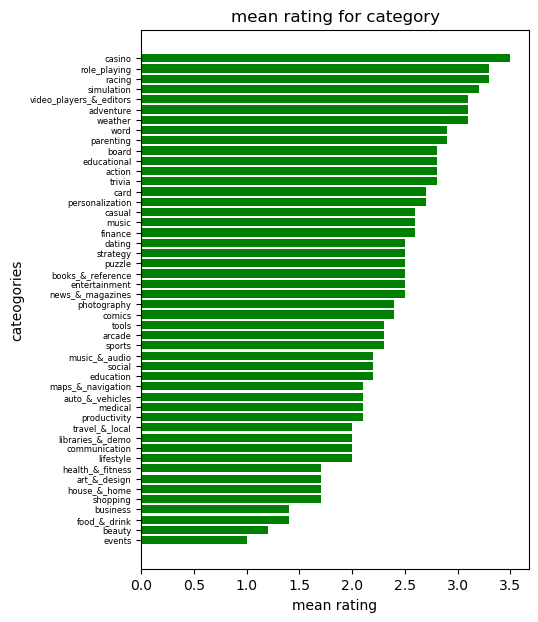

In [31]:
#mean rating for category
category = list(mean_rating_and_rating_count_for_category().loc['rating'].sort_values(ascending = True).index)
mean_rating = list(mean_rating_and_rating_count_for_category().loc['rating'].sort_values(ascending = True))
plt.figure(figsize=(5,7)) #5,7
plt.title('mean rating for category')
plt.xlabel('mean rating')
plt.ylabel('cateogories')
plt.barh(category,mean_rating, color = 'green')
plt.yticks(fontsize = 6)
#plt.savefig('mean_rating_for_categories.png', dpi=300, bbox_inches='tight')
plt.show()

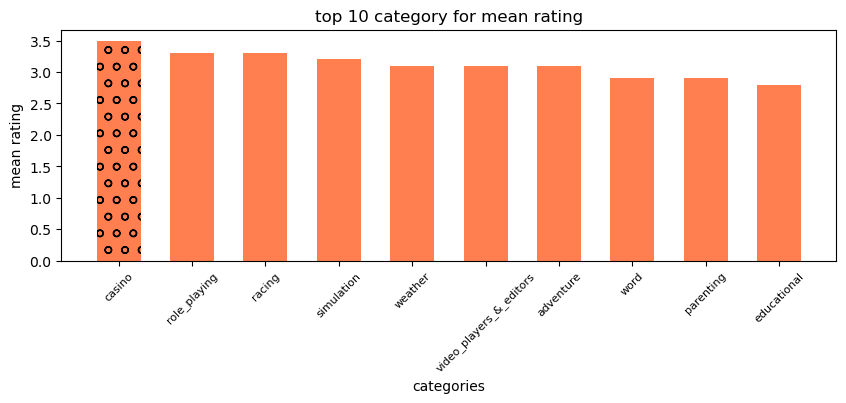

In [32]:
#top 10 categories for mean rating
mean_rating_top_10_category = mean_rating_and_rating_count_for_category().loc['rating'].sort_values(ascending=False)[0:10]
top_10_categories_label = mean_rating_and_rating_count_for_category().loc['rating'].sort_values(ascending=False)[0:10].index
plt.figure(figsize=(10,3))
plt.title('top 10 category for mean rating')
plt.xlabel('categories')
plt.ylabel('mean rating')
bar_chart = plt.bar(top_10_categories_label,mean_rating_top_10_category,color = 'coral',width = 0.6)
bar_chart[0].set_hatch('o')
plt.xticks(rotation = 45,fontsize=8)
#plt.savefig('top_10.png', dpi=300, bbox_inches='tight')
plt.show()

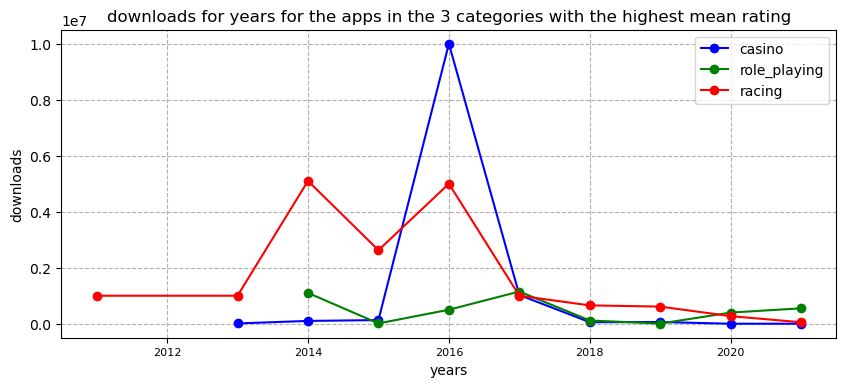

In [33]:
#downloads for years for the apps in the 3 categories with the highest mean rating
def number_of_installs_in_category(category):
    category_apps = copy_df[copy_df['category']==category]
    list_of_years = sorted(list(category_apps['released'].value_counts().index)) #total years
    number_of_installs_for_years = [] #total number of downloads in the category for year
    for i in list_of_years:
        subset_for_years = category_apps[category_apps['released'] == i]
        installs_for_years = subset_for_years['installs'].astype(int).sum()
        number_of_installs_for_years.append(installs_for_years)
    return number_of_installs_for_years 

def list_of_years_in_category(category):
    category_apps = copy_df[copy_df['category']==category]
    list_of_years = sorted(list(category_apps['released'].value_counts().index))
    return list_of_years

plt.figure(figsize=(10,4))
plt.title('downloads for years for the apps in the 3 categories with the highest mean rating')
plt.plot(list_of_years_in_category('casino'),number_of_installs_in_category('casino'),color='blue',marker = 'o', label='casino')
plt.plot(list_of_years_in_category('role_playing'),number_of_installs_in_category('role_playing'),color='green',marker = 'o', label='role_playing')
plt.plot(list_of_years_in_category('racing'),number_of_installs_in_category('racing'),color='red',marker = 'o', label='racing')
plt.xlabel('years')
plt.ylabel('downloads')
plt.legend()
plt.grid(linestyle='--')
plt.xticks(fontsize=8)
#plt.savefig('dowloads_complete.png', dpi=300, bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


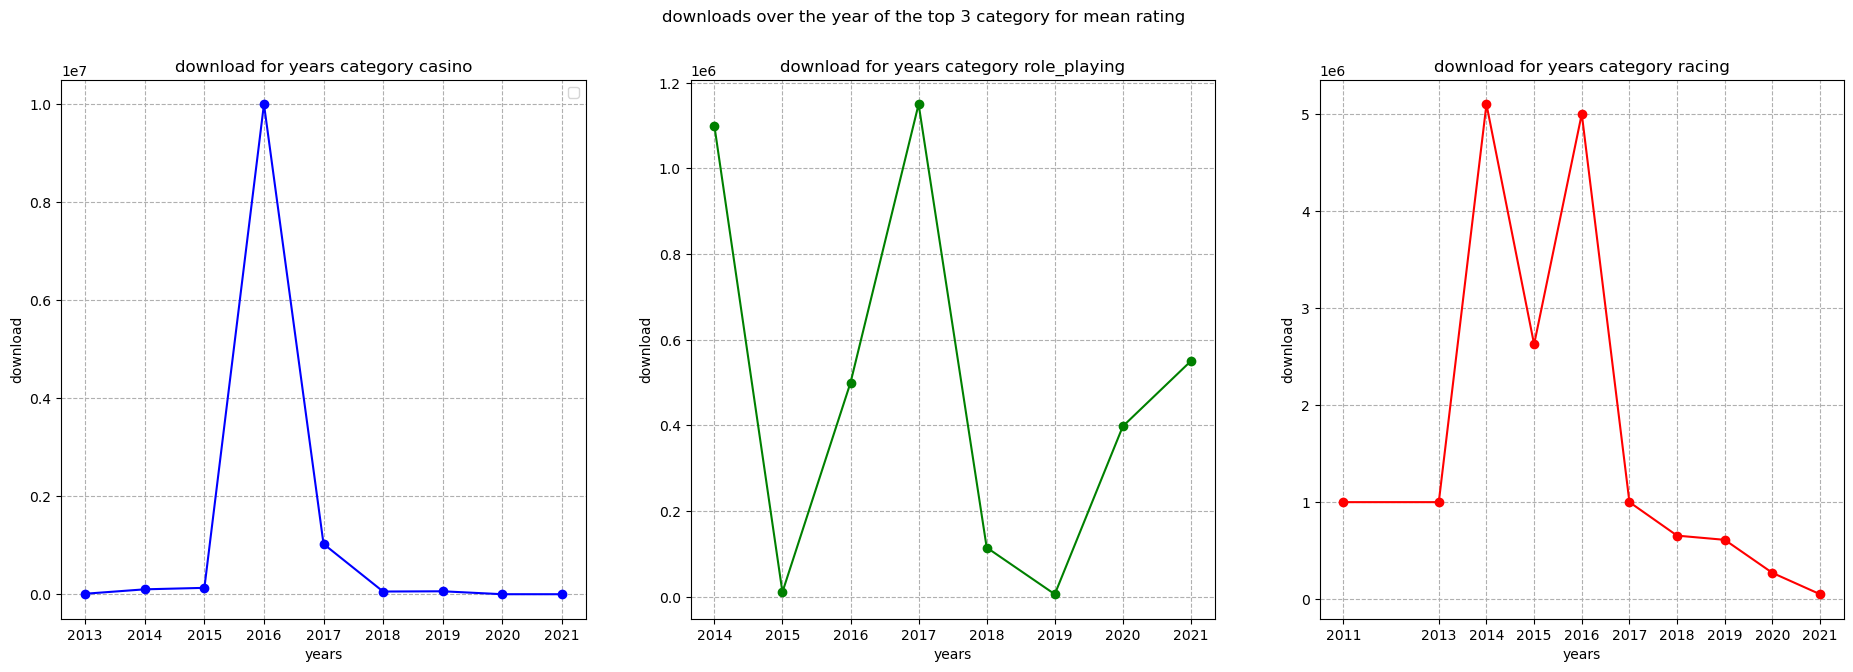

In [34]:
#downloads over the year of the top 3 category for mean rating
fig,ax = plt.subplots(1,3,figsize=(23,7))
ax[0].set_title('download for years category casino')
ax[0].set_xlabel('years')
ax[0].set_ylabel('download')
ax[0].legend()
ax[0].set_xticks(list_of_years_in_category('casino'))
ax[0].grid(linestyle='--')
ax[0].plot(list_of_years_in_category('casino'),number_of_installs_in_category('casino'),color='blue',marker = 'o', label='casino')
ax[1].set_title('download for years category role_playing')
ax[1].set_xlabel('years')
ax[1].set_ylabel('download')
ax[1].set_xticks(list_of_years_in_category('role_playing'))
ax[1].grid(linestyle='--')
ax[1].plot(list_of_years_in_category('role_playing'),number_of_installs_in_category('role_playing'),color='green',marker = 'o', label='role_playing')
ax[2].set_title('download for years category racing')
ax[2].set_xlabel('years')
ax[2].set_ylabel('download')
ax[2].set_xticks(list_of_years_in_category('racing'))
ax[2].grid(linestyle='--')
ax[2].plot(list_of_years_in_category('racing'),number_of_installs_in_category('racing'),color='red',marker = 'o', label='racing')
fig.suptitle('downloads over the year of the top 3 category for mean rating')
#plt.savefig('downloads_top3.png', dpi=300, bbox_inches='tight')
fig.show()

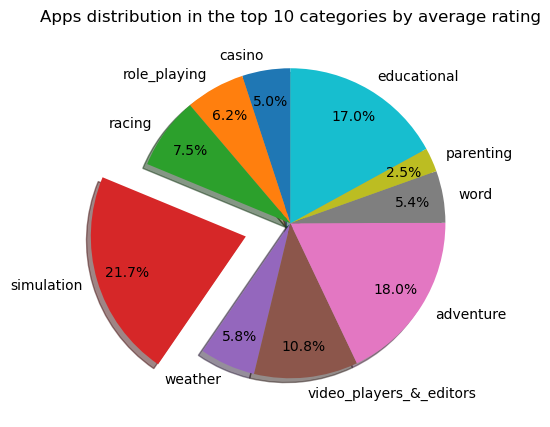

In [35]:
#Percentage of apps in top 10 categories by average rating
top_10_categories_label #top 10 categories for mean rating
number_of_apps_in_top_10_categories = []
for i in top_10_categories_label:
    number_of_apps_in_top_10_categories.append(copy_df[copy_df['category'] == i].shape[0])
number_of_apps_in_top_10_categories

plt.figure(figsize=(5,7))
plt.title('Apps distribution in the top 10 categories by average rating')
explosion = (0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0)
plt.pie(number_of_apps_in_top_10_categories,labels=top_10_categories_label,autopct='%.1f%%',shadow=True,startangle=90,explode=explosion,pctdistance=0.80)
#plt.savefig('apps_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

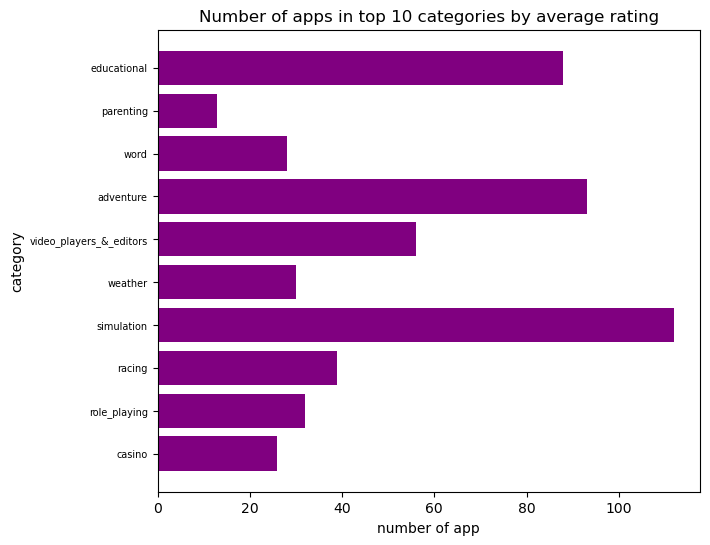

In [36]:
#Number of apps in top 10 categories by average rating
plt.figure(figsize=(7,6))
plt.title('Number of apps in top 10 categories by average rating')
plt.xlabel('number of app')
plt.ylabel('category')
plt.barh(top_10_categories_label,number_of_apps_in_top_10_categories,color='purple')
plt.yticks(fontsize=7)
#plt.savefig('n_apps3.png', dpi=300, bbox_inches='tight')
plt.show()

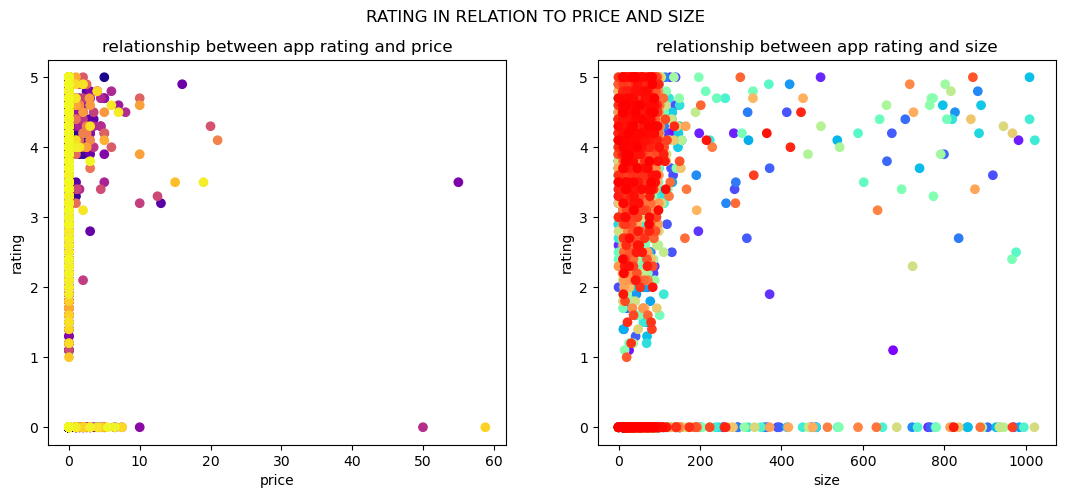

In [37]:
#scatter plot rating of the app based on the price and
#scatter plot rating of the app based on the size
prices = list(copy_df['price'])
ratings = list(copy_df['rating'])
sizes = list(copy_df['size'])
colors = np.arange(len(ratings))
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].set_title('relationship between app rating and price')
ax[0].set_xlabel('price')
ax[0].set_ylabel('rating')
ax[0].scatter(prices,ratings,c=colors,cmap='plasma')
ax[1].set_title('relationship between app rating and size')
ax[1].set_xlabel('size')
ax[1].set_ylabel('rating')
ax[1].scatter(sizes,ratings,c=colors,cmap='rainbow')
fig.suptitle('RATING IN RELATION TO PRICE AND SIZE')
#plt.savefig('scatters.png', dpi=300, bbox_inches='tight')
fig.show()

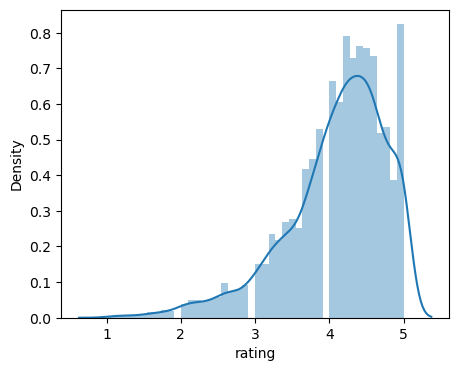

In [38]:
#distribution of the ratings
plt.figure(figsize=(5,4))
#deal with outlaiers
musk_different_from_min = copy_df['rating'] != copy_df['rating'].min()
df_without_outliers = copy_df[musk_different_from_min]
sns.distplot(df_without_outliers['rating'],hist = True)
plt.xticks()
#plt.savefig('hist.png', dpi=300, bbox_inches='tight')
plt.show()

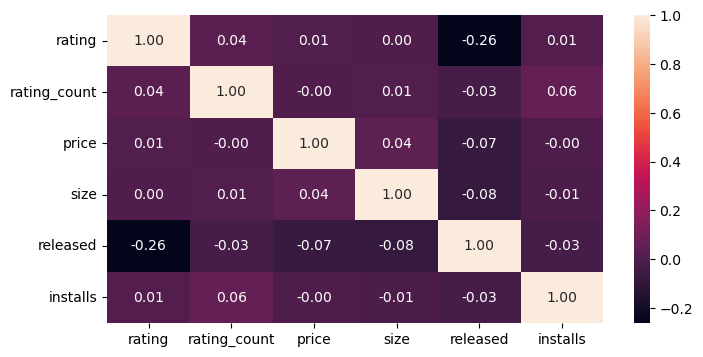

In [39]:
#heatmap correlation of the dataset
plt.figure(figsize=(8,4))
df_for_heatmap = copy_df[['rating','rating_count','price','size','released','installs']]
sns.heatmap(df_for_heatmap.corr(),annot=True,fmt='.2f')
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

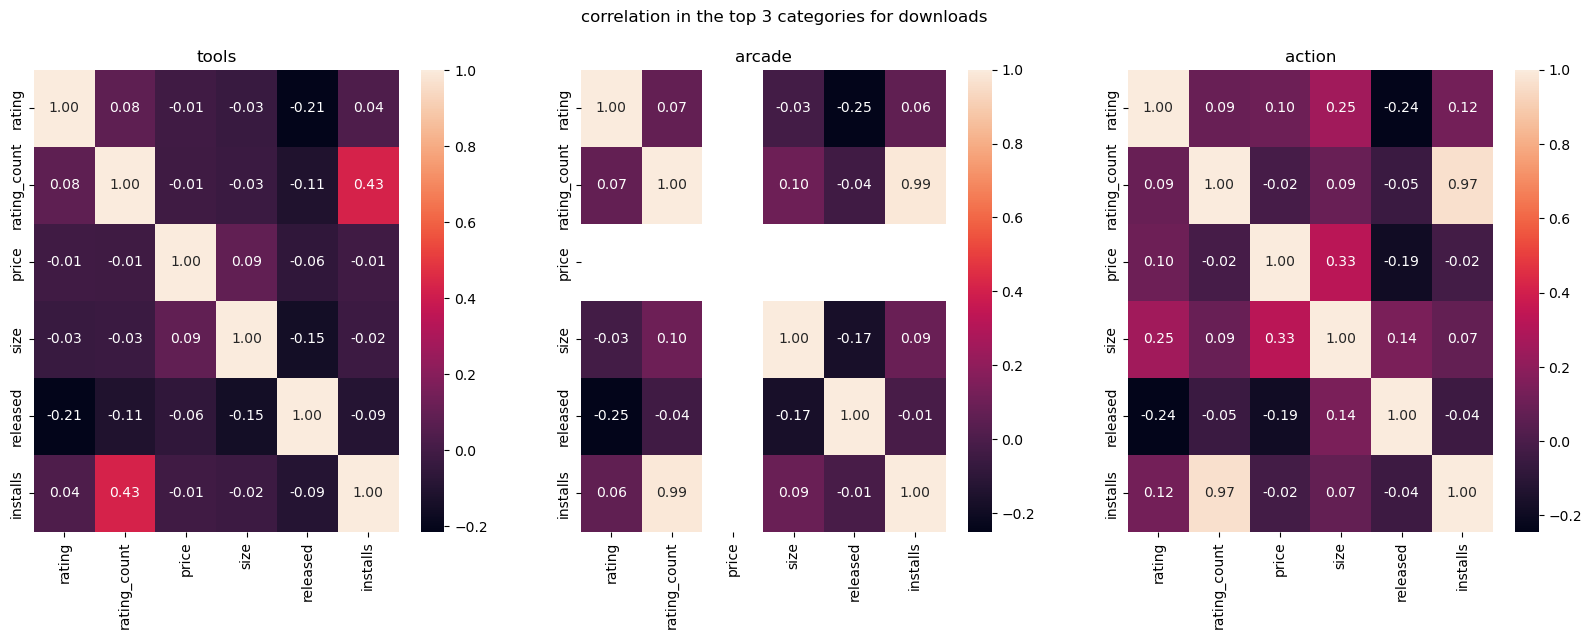

In [40]:
#correlation of the top 3 most downloaded categories
df_group_category = copy_df.groupby('category').sum()
download_for_category = df_group_category['installs'].sort_values(ascending=False)
top_3_most_dowloaded_categories = list(download_for_category.index[0:3])
fig,axs = plt.subplots(1,3,figsize= (20,6))
#first category
axs[0].set_title(top_3_most_dowloaded_categories[0])
apps_category_1 = copy_df[copy_df['category'] == top_3_most_dowloaded_categories[0]]
heatmap_category_1 = apps_category_1[['rating','rating_count','price','size','released','installs']]
sns.heatmap(heatmap_category_1.corr(),annot=True,fmt='.2f',ax=axs[0])
#second category
axs[1].set_title(top_3_most_dowloaded_categories[1])
apps_category_2 = copy_df[copy_df['category'] == top_3_most_dowloaded_categories[1]]
heatmap_category_2 = apps_category_2[['rating','rating_count','price','size','released','installs']]
sns.heatmap(heatmap_category_2.corr(),annot=True,fmt='.2f',ax=axs[1])
#third category
axs[2].set_title(top_3_most_dowloaded_categories[2])
apps_category_3 = copy_df[copy_df['category'] == top_3_most_dowloaded_categories[2]]
heatmap_category_3 = apps_category_3[['rating','rating_count','price','size','released','installs']]
sns.heatmap(heatmap_category_3.corr(),annot=True,fmt='.2f',ax=axs[2])
fig.suptitle('correlation in the top 3 categories for downloads')
#plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')
fig.show()

MODEL

In [41]:
#I am going to build a multiple linear regression to predict the rating of an application based on its features.
#STEP 1: encoding the data
#most of the data encoding has been done in the data wrangling part, we still need to encode the category
#and content_rating column.

#encoding of the categories
copy_df['category'].unique() #checking of the unique categories

array(['action', 'shopping', 'food_&_drink', 'business', 'education',
       'health_&_fitness', 'personalization', 'music_&_audio', 'tools',
       'entertainment', 'news_&_magazines', 'lifestyle', 'role_playing',
       'books_&_reference', 'travel_&_local', 'casual', 'sports',
       'medical', 'social', 'auto_&_vehicles', 'puzzle', 'music',
       'productivity', 'strategy', 'finance', 'libraries_&_demo',
       'simulation', 'photography', 'word', 'dating', 'educational',
       'arcade', 'card', 'maps_&_navigation', 'video_players_&_editors',
       'communication', 'art_&_design', 'racing', 'parenting',
       'adventure', 'events', 'trivia', 'beauty', 'house_&_home',
       'weather', 'board', 'casino', 'comics'], dtype=object)

In [42]:
#i will use the class LabelEncoder
label_encoder = LabelEncoder()
encoded_data = list(label_encoder.fit_transform(copy_df['category']))
encoded_series = pd.Series(encoded_data, name = 'new label')
decoded_data = label_encoder.inverse_transform(encoded_data)
decoded_series = pd.Series(decoded_data, name = 'old label')
new_category_label = pd.DataFrame({'new_label':encoded_series,'old_label':decoded_series})
new_category_label
#new_category_label.to_csv('encoded_category.csv',index = False)


,new_label,old_label
0,0,action
1,37,shopping
2,20,food_&_drink
3,8,business
4,15,education
...,...,...
9645,8,business
9646,42,tools
9647,31,personalization
9648,21,health_&_fitness


In [43]:
#i do the same for the content_rating column
copy_df['content_rating'].unique() #checking of the unique content_rating labels

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Unrated'],
      dtype=object)

In [44]:
label_encoder2 = LabelEncoder()
encoded_data2 = list(label_encoder2.fit_transform(copy_df['content_rating']))
encoded_series2 = pd.Series(encoded_data2, name = 'new label')
decoded_data2 = label_encoder2.inverse_transform(encoded_data2)
decoded_series2 = pd.Series(decoded_data2, name = 'old label')
new_content_rating_label = pd.DataFrame({'new_label':encoded_series2,'old_label':decoded_series2})
new_content_rating_label
#new_content_rating_label.to_csv('content_rating.csv',index=False)

,new_label,old_label
0,0,Everyone
1,0,Everyone
2,3,Teen
3,0,Everyone
4,0,Everyone
...,...,...
9645,0,Everyone
9646,0,Everyone
9647,0,Everyone
9648,0,Everyone


In [45]:
#apply the modifications to our dataset
copy_df['category'] = encoded_data
copy_df['content_rating'] = encoded_data2
copy_df.head() #checking the result

,category,rating,rating_count,installs,free,price,size,released,content_rating,ad_supported,in_app_purchases
app_name,,,,,,,,,,,
snow_mo:_cannon_shooting_game,0,0.0,0.0,1,0,0.0,49.0,2021,0,0.0,0.0
404_gallery,37,5.0,15.0,10,0,0.0,83.0,2020,0,0.0,0.0
banana_pudding_cheesecake_-_cheesecake_recipe,20,0.0,0.0,1,0,0.0,25.0,2021,3,0.0,0.0
poataxi,8,4.5,17.0,500,0,0.0,77.0,2013,0,0.0,0.0
aptitude_reasoning_tricks_&_tips,15,0.0,0.0,100,0,0.0,38.0,2019,0,0.0,0.0


In [46]:
#exporting the cleaned dataset in a csv format
#copy_df.to_csv('cleaned_df.csv',index = False)

MODEL TEST

In [47]:
X = copy_df.drop('rating',axis=1) #dataframe without the rating feature
Y = copy_df['rating'] #rating feature

In [48]:
#cross validation
#split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#print the shape of our train and testing sets
print('training set shape:',X_train.shape, Y_train.shape)
print('testing set shape:',X_test.shape, Y_test.shape)

training set shape: (7720, 10) (7720,)
testing set shape: (1930, 10) (1930,)


In [49]:
#build the model
lr = LinearRegression()
#train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [50]:
#predict on the testing set
#Y_pred are predicted values of the target variable based on the features
Y_pred = lr.predict(X_test)

In [51]:
#evaluate the perfomance of the model
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
intercept = lr.intercept_
print('R2 score',r2)
print('mean squared error',mse)
print('mean absolute error',mae)
print('intercept',intercept)

R2 score 0.06840449754401368
mean squared error 4.140011315773477
mean absolute error 1.9051721615648125
intercept 525.6680962023812


R2 score

 0.06840449754401368


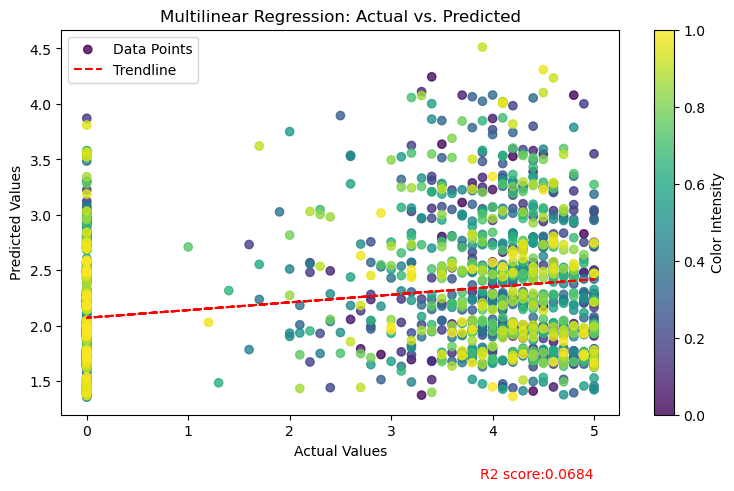

In [52]:
plt.figure(figsize=(9,5))
colors = np.linspace(0, 1, len(Y_test))
plt.scatter(Y_test,Y_pred,c=colors,cmap='viridis',alpha=0.8,label='Data Points')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multilinear Regression: Actual vs. Predicted")
z1 = np.polyfit(Y_test, Y_pred, 1)
p1 = np.poly1d(z1)
plt.plot(Y_test, p1(Y_test), color='red', label='Trendline',linestyle='--')
color_bar = plt.colorbar()
color_bar.set_label('Color Intensity')
print('R2 score',r2)
plt.text(5, 0.6, f'R2 score:{r2.round(4)}', fontsize=10, color='red', ha='right', va='bottom')
plt.legend()
#plt.savefig('multilinear6.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
#RANDOM FOREST REGRESSION
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(7720, 10)
(7720,)


In [54]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
#random forest regression prediction
y_pred = rf.predict(x_test)

In [56]:
#evaluate the perfomance of the model
r2_random_for = r2_score(y_test,y_pred)
mse_random_for = mean_squared_error(y_test,y_pred)
mae_random_for = mean_absolute_error(y_test,y_pred)
print('R2 score',r2_random_for)
print('mean squared error',mse_random_for)
print('mean absolute error',mae_random_for)
#radom forest regression perform better

R2 score 0.9445085474462426
mean squared error 0.24575629289544484
mean absolute error 0.2779669479397977


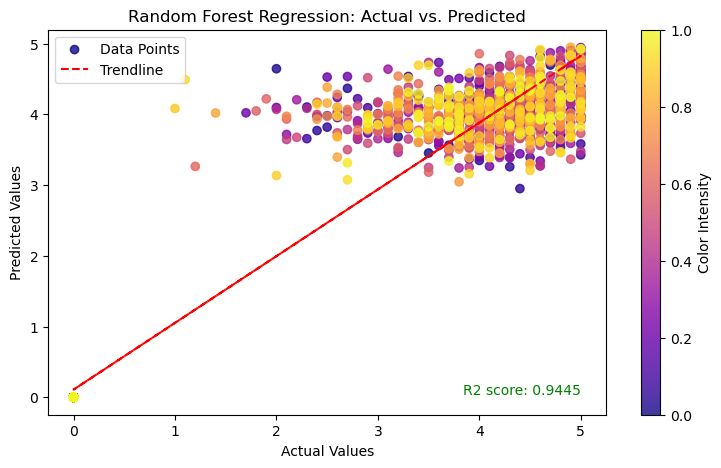

In [57]:
#PLOT OF RANDOM FOREST REGRESSION
colors = np.linspace(0, 1, len(y_test))
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, c=colors, cmap='plasma', alpha=0.8, label='Data Points')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
z2 = np.polyfit(y_test, y_pred, 1)
p2 = np.poly1d(z2)
plt.plot(y_test, p2(y_test), color='red', label='Trendline',linestyle='--')
color_bar_2 = plt.colorbar()
color_bar_2.set_label('Color Intensity')
plt.text(max(y_test), min(y_pred), f'R2 score: {r2_random_for.round(4)}', fontsize=10, color='green', ha='right', va='bottom')
plt.legend()
#plt.savefig('random_f.png', dpi=300, bbox_inches='tight')
plt.show()

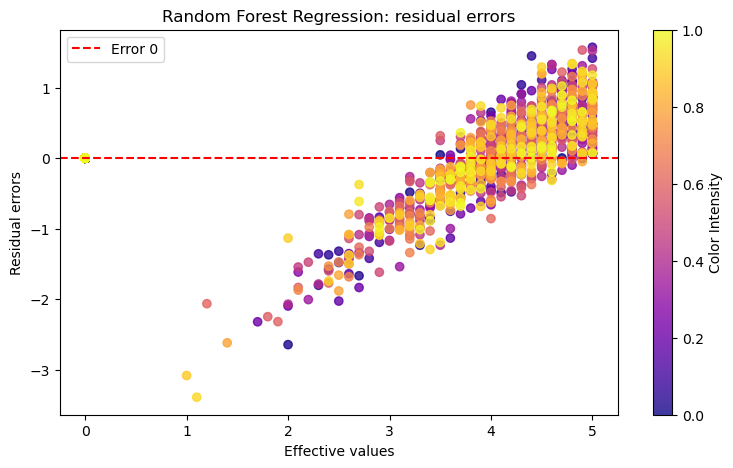

In [58]:
#determination of residual errors and plot
errors = y_test - y_pred
plt.figure(figsize=(9,5))
plt.scatter(y_test, errors,c=colors, cmap='plasma', alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--', label='Error 0')
color_bar_3 = plt.colorbar()
color_bar_3.set_label('Color Intensity')
plt.title('Random Forest Regression: residual errors')
plt.legend()
plt.xlabel('Effective values')
plt.ylabel('Residual errors')
#plt.savefig('error_res.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
#testing the model on a row:
row1 = x_test.iloc[-2]
row1

category              20.0
rating_count           0.0
installs             100.0
free                   0.0
price                  0.0
size                  87.0
released            2020.0
content_rating         0.0
ad_supported           0.0
in_app_purchases       0.0
Name: riga_|_пермь, dtype: float64

In [60]:
row1_reshaped = row1.values.reshape(1,-1)
row_test_name = row1.name
row_test_name

'riga_|_пермь'

In [61]:
copy_df.loc[row_test_name]

category              20.0
rating                 0.0
rating_count           0.0
installs             100.0
free                   0.0
price                  0.0
size                  87.0
released            2020.0
content_rating         0.0
ad_supported           0.0
in_app_purchases       0.0
Name: riga_|_пермь, dtype: float64

In [62]:
ypredict_test = rf.predict(row1_reshaped)
ypredict_test[0].round(4)

0.0

In [63]:
#function to predict the rating based on the user's values.
def rating_prediction():
    data = {}
    category = input('category: ')
    category_labels_df = new_category_label[new_category_label['old_label'] == str(category)]
    category_encoded = category_labels_df['new_label'].iloc[0] 
    data['category'] = float(category_encoded)
    rating_count = input('rating count: ')
    data['rating_count'] = float(rating_count)
    installs = input('installs: ')
    data['installs'] = float(installs)
    free = input('free: ')
    data['free'] = float(free)
    price = input('price: ')
    data['price'] = float(price)
    size = input('size: ')
    data['size'] = float(size)
    released = input('released year: ')
    data['released'] = float(released)
    content_rating = input('content rating: ')
    content_rating_labels_df = new_content_rating_label[new_content_rating_label['old_label'] == content_rating]
    content_rating_encoded = content_rating_labels_df['new_label'].iloc[0] 
    data['content_rating'] = float(content_rating_encoded)
    ad_supp = input('ad supported: ')
    data['ad_supported'] = float(ad_supp)
    in_app_purch = input('in app purchases: ')
    data['in_app_purchases'] = float(in_app_purch)
    values_to_predict = pd.DataFrame(data,index=[0]) 
    prediction = rf.predict(values_to_predict)
    return prediction[0].round(4)
#rating_prediction()